# **Classification I Lab: Introduction to the classification problem**

Author: Vanessa Gómez Verdejo (http://vanessa.webs.tsc.uc3m.es/)
Updated: 07/02/2017 (working with sklearn 0.18.1)

In this lesson we are going to learn some basic concepts related to the ML classification tools. For this purpose, we will start working on a binary synthetic problem so that we are able to plot the classification boundaries and, therefore, analyze the advantages and/or disadvantages of each approach at first sight. 

We will start managing different classification loss functions and analyze the influence of regularization terms.  Then, we will use a linear SVM as a standard classifier to explore different strategies to solve multiclass problems and we will evaluate its performance by means of different criteria (accuracy, confusion matrix, ROC curve, ... ). 


#### ** During this lab we will cover: **
#### *Part 1: Loss functions* 
#### *Part 2: Regularizations* 
#### *Part 3: From binary classifiers to multiclass formulations*
#### *Part 4: Performance evaluation* 

To implement the different approaches we will base in [Scikit-Learn](http://scikit-learn.org/stable/) python toolbox.

As you progress in this notebook, you will have to complete some exercises. Each exercise includes an explanation of what is expected, followed by code cells where one or several lines will contain `<FILL IN>`.  The cell that needs to be modified will have `# TODO: Replace <FILL IN> with appropriate code` on its first line.  Once the `<FILL IN>` sections are updated, the code can be run; below this cell, you will find the test cell (beginning with the line `# TEST CELL`) and you can run it to verify the correctness of your solution.  

Note: to work with the testing cells, you may need to install test_helper module (`pip install test_helper`).

### ** Part 1: Loss functions **

The goal of this section relies on studying the influence of the loss function over the classifier performance in a noisy scenario (with outliers). For this purpose, we are going to use the method SGDClassifier( ), which let us minimize a different loss functions by means of a [Sequential Gradient Descend algorithm](https://en.wikipedia.org/wiki/Stochastic_gradient_descent); in this way, we can train linear classifiers with different loss functions. 

#### ** 1.1: Creating a data set **

Before training any classifier, we need to create a training and test data sets. Please, complete the below code to be able to:
* Build a bidimensional binary problem with 100 training samples (without considering outliers) and 400 testing ones
* Normalize the data to zero mean and unitary standard deviation 
* Add the provided outlier data (X_outlier, Y_outlier) to the training samples

Useful functions: [make_classification( )](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html), [train_test_split( )](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) and [StandardScaler( )](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [1]:
%matplotlib inline

In [2]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler


# Initialize the random generator seed to compare results
np.random.seed(1)

# Generating artifial data 
X, Y = datasets.make_classification(n_samples=500, n_features=2, n_clusters_per_class=2, 
                                    class_sep=2, n_redundant=0, flip_y =0.01)

# Creating training and test sets  
# (note that the parameters have to be fixed to obtain 100 training data and 400 test samples)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

# Normalizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Adding some outliers
X_outlier = np.array([ [-2.5,-3.5], [-3,-4], [-2.5,-4.5]])
Y_outlier = np.array([1, 1, 1])
# Use np.hstack() and np.vstack() functions to concatenate the outliers with the training data 
X_train = np.vstack((X_train, X_outlier))
Y_train = np.hstack((Y_train, Y_outlier))

In [3]:
###########################################################
# TEST CELL
###########################################################

from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(X_train.shape, (103, 2), 'incorrect result: training data dimensions are uncorrect')
Test.assertEquals(X_test.shape, (400, 2), 'incorrect result: test data dimensions are uncorrect')

# TEST Training and test data generation
Test.assertEquals(np.round(np.mean(X_train[:-3]),12), 0, 'incorrect result: training data are uncorrectly normalized (mean)')
Test.assertEquals(np.round(np.std(X_train[:-3]),12), 1, 'incorrect result: training data are uncorrectly normalized (standard deviation)')
Test.assertEquals(np.round(np.mean(X_test.ravel()),2), 0.04, 'incorrect result: test data  are uncorrectly normalized (mean)')
Test.assertEquals(np.round(np.std(X_test.ravel()),5), 1.00084, 'incorrect result: test data  are uncorrectly normalized (standard deviation)')

ImportError: No module named test_helper

**Advanced work**: try to implement yourself the normalization process. That is, write the code lines that will let you remove the mean of each variable and set its standard deviation to one. Don't forget to learn the original mean and standard deviation values from the training data and, then, apply over training and test samples.

#### ** 1.2: Training classifiers  with different loss functions  **

Here, let's use the [SGDClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) to train linear classifiers with different loss functions. This method uses a stochastic gradient descent (SGD) learning: sample by sample, it estimates the gradient of the loss function and, then, it updates the solution according to gradient direction. After several steps, the solution reaches the minimum of the loss function.

Here, we are going to test three loss functions:
1. 'hinge': penalizes with a linear loss the missclassfied data. This is the cost used by SVM classifiers.
2. ‘squared_hinge’: penalizes with a squared loss the missclassfied data. It is usually used in regression problems.
3. ‘log’: resulting of maximizing the log likelihood ratio test. This is the loss function of logistic regression classifiers.

Next cell provides you the example code to train a SGDClassifier with the 'hinge' loss, take it as reference to complete the code lines able to train the SGDClassifiers with 'squared_hinge' and 'log' cost functions.

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn.linear_model import SGDClassifier

# Hinge loss
clf_hinge = SGDClassifier(loss='hinge', penalty ='none', learning_rate='constant', eta0=0.001, n_iter=100)
clf_hinge.fit(X_train, Y_train)

# Squared_hinge loss
clf_sqhinge = SGDClassifier(loss='squared_hinge', penalty ='none', learning_rate='constant', eta0=0.001, n_iter=100)
clf_sqhinge.fit(X_train, Y_train)

# Log loss
clf_log = SGDClassifier(loss='log', penalty ='none', learning_rate='constant', eta0=0.001, n_iter=100)
clf_log.fit(X_train, Y_train)


print 'Classifiers sucessfully trained'

Review the methods of the objects clf\_hinge, clf\_sqhinge and clf\_log classifiers and use the appropriate one to compute their classification accuracies over the text data.

Trick: if, for example, you write down "clf\_hinge." plus tab key, you can check all the methods belonging to the object.

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Compute the test accuracies 
acc_hinge = clf_hinge.score(X_test, Y_test)
acc_sqhinge = clf_sqhinge.score(X_test, Y_test)
acc_log = clf_log.score(X_test, Y_test)

print("The test accuracy with hinge loss is %2.2f%%" %(100*acc_hinge))
print("The test accuracy with squared hinge loss is %2.2f%%" %(100*acc_sqhinge))
print("The test accuracy with log loss is %2.2f%%" %(100*acc_log))

In [24]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(acc_hinge, 0.995, 'incorrect result: Accuracy of the classifier with hinge loss is uncorrect')
Test.assertEquals(acc_sqhinge, 0.95, 'incorrect result: Accuracy of the classifier with squared hinge loss is uncorrect')
Test.assertEquals(acc_log, 0.975, 'incorrect result: Accuracy of the classifier with log loss is uncorrect')


1 test passed.
1 test passed.
1 test passed.


Finally, to analyze the differences of the above classifiers, let's plot their classification boundaries.

The following function let you plot a classification boundary and classification regions for a given classifier. Please, use it to plot the classification regions of the above classifiers.

In [25]:
# Plot the decision boundary
import matplotlib.pyplot as plt

def plot_boundary(clf, X, Y, plt):
    """Plot the classification regions for a given classifier.

    Args:
        clf: scikit-learn classifier object.
        X (numpy dnarray): training or test data to be plotted (number data x number dimensions). Only frist two 
                            dimensions are ploted
        Y (numpy dnarray): labels of the training or test data to be plotted (number data x 1).
        plt: graphic object where you wish to plot                                             
   
    """

    plot_colors = "brymc"
    plot_step = 0.02
    n_classes = np.unique(Y).shape[0]
    # Plot the decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    plt.axis("tight")

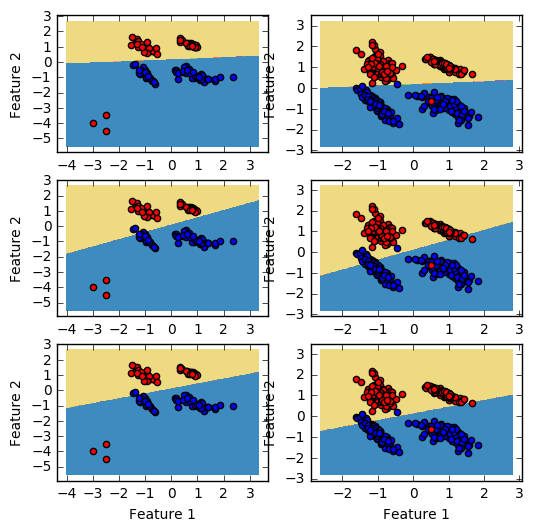

In [26]:
plt.figure(1,figsize=(6, 6))
plt.subplot(3,2,1)
plot_boundary(clf_hinge, X_train, Y_train, plt)
plt.subplot(3,2,3)
plot_boundary(clf_sqhinge, X_train, Y_train, plt)
plt.subplot(3,2,5)
plot_boundary(clf_log, X_train, Y_train, plt)
plt.subplot(3,2,2)
plot_boundary(clf_hinge, X_test, Y_test, plt)
plt.subplot(3,2,4)
plot_boundary(clf_sqhinge, X_test, Y_test, plt)
plt.subplot(3,2,6)
plot_boundary(clf_log, X_test, Y_test, plt)
plt.show()

How do the outliers affect to the different cost functions?

### ** Part 2: The effect of the regularization**

Adding a regularization penalty in the classification cost function let you control the generalization capability of the classifier. Furthermore, some especial regularization terms provide additional properties such as the sparsity of the solution.

Here, we are going to analyze this effect by including a regularization term in the SGDClassifier used in the previous section. For this exercise, select the squared_hinge loss function and train the classifier:
* Without any regularization (penalty = 'none') 
* Including an l2 regularization (penalty = 'l2')
* Including an l1 regularization (penalty = 'l1')

For two last cases, set the regularization factor to 1 (alpha=1).

In [30]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

clf_noreg = SGDClassifier(loss='squared_hinge', penalty = 'none', alpha= 0, learning_rate='constant', eta0=0.001, n_iter=100)
clf_noreg.fit(X_train, Y_train)

clf_l2reg = SGDClassifier(loss='squared_hinge', penalty = 'l2', alpha= 1, learning_rate='constant', eta0=0.001, n_iter=100)
clf_l2reg.fit(X_train, Y_train)

clf_l1reg = SGDClassifier(loss='squared_hinge', penalty = 'l1', alpha= 1, learning_rate='constant', eta0=0.001, n_iter=100)
clf_l1reg.fit(X_train, Y_train)

print 'Classifiers sucessfully trained'

Classifiers sucessfully trained


Obtain the test accuracies of each classifier and, for the classifier with l1 regularization, analyze the values of their coefficients (check the variables of the object clf\_l1reg).

In [31]:
acc_noreg = clf_noreg.score(X_test,Y_test)
acc_l2reg = clf_l2reg.score(X_test,Y_test)
acc_l1reg = clf_l1reg.score(X_test,Y_test)
coef_l1reg =  clf_l1reg.coef_

print("The test accuracy without regularization is %2.2f%%" %(100*acc_noreg))
print("The test accuracy with l2 regularization is %2.2f%%" %(100*acc_l2reg))
print("The test accuracy with l1 regularization loss is %2.2f%%" %(100*acc_l1reg))
print("The classifier coefficients with l1 regularization are (%2.2f, %2.2f)" %(coef_l1reg[0][0], coef_l1reg[0][1]))

The test accuracy without regularization is 95.25%
The test accuracy with l2 regularization is 97.00%
The test accuracy with l1 regularization loss is 97.75%
The classifier coefficients with l1 regularization are (0.00, 0.20)


In [32]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(acc_noreg, 0.9525, 'incorrect result: Accuracy of the classifier without regularization is uncorrect')
Test.assertEquals(acc_l2reg, 0.97, 'incorrect result: Accuracy of the classifier with l2 regularization is uncorrect')
Test.assertEquals(acc_l1reg, 0.9775, 'incorrect result: Accuracy of the classifier with l1 regularization is uncorrect')
Test.assertEquals(coef_l1reg[0][0], 0, 'incorrect result: Coefficients the classifier with l1 regularization are uncorrect')


1 test passed.
1 test passed.
1 test passed.
1 test passed.


The following code, let you display the classification boundaries of the above classifiers.

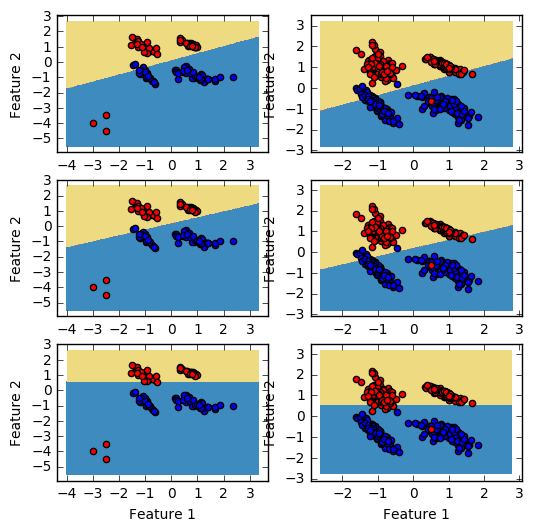

In [33]:
plt.figure(1,figsize=(6, 6))
plt.subplot(3,2,1)
plot_boundary(clf_noreg, X_train, Y_train, plt)
plt.subplot(3,2,3)
plot_boundary(clf_l2reg, X_train, Y_train, plt)
plt.subplot(3,2,5)
plot_boundary(clf_l1reg, X_train, Y_train, plt)
plt.subplot(3,2,2)
plot_boundary(clf_noreg, X_test, Y_test, plt)
plt.subplot(3,2,4)
plot_boundary(clf_l2reg, X_test, Y_test, plt)
plt.subplot(3,2,6)
plot_boundary(clf_l1reg, X_test, Y_test, plt)
plt.show()

How does the regularization affect to the provided solution?

### ** Part 3: From binary classifiers to multiclass formulations **

When we have to face a multiclass problems, some classifiers are inherently multiclass (for instance, K-Nearest Neighbours); however, other ones have been designed for the binary case, so we have to extend them to the multiclass case. More common strategies relies on applying a 1 vs. 1 approach or a 1 vs. rest scheme. 

By default, Scikit-learn implements all classifiers in a one vs. all (or one vs. rest) fashion (except for the linear SVM implemented by the SVC() method). However, to let the user select the multiclass implementation to be used, it also includes wrapper functions that work over the classifier to force the multiclass strategy to be applied: [OneVsRestClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) and [OneVsOneClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier). 

In this part of the lab session, we are going to learn to use these multiclass implementations. So, we are going to work with a multiclass dataset and we will use a linear SVM classifier as baseline method to analyze the different multiclass strategies. 

#### ** 3.1 Load and prepare the data **

The following code builds a bidimensional problem with four classes and 500 samples, it creates the training and testing partitions with the 60% and 40% of the original data and, it normalizes the data to zero mean and unitary standard deviation.

In [34]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the random generator seed to compare results
np.random.seed(0)

# Generating artifial data
X, Y = datasets.make_classification(n_samples=500, n_features=2, n_classes = 4, n_clusters_per_class=1,
                                    class_sep=2, n_redundant=0, flip_y =0.01)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### ** 3.2 Working with multiclass linear SVMs **

Next cell contains the necessary code to train, by means of the svm.SVC method, a linear SVM fixing its penalty parameter to 100.

In [35]:
from sklearn.svm import SVC
clf = SVC(C=100, kernel='linear').fit(X_train, Y_train)
print 'Linear SVM succesfully trained'

Linear SVM succesfully trained


Use this code as example to obtain two different multiclass configurations: one vs. all and one vs. one. For this purpose, you can use the functions: [OneVsRestClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) and [OneVsOneClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier). Check the number of classifiers that are built by each configuration (you can use access to the .estimators\_ parameter of the resulting classifier object). Finally, compute their classification accuracies.

When you complete the code successfully, you can use the last cell to plot the classification boundaries.

In [38]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Train a linear SVM with a 1 vs. all configuration
from sklearn.multiclass import OneVsRestClassifier
# 1 vs. rest
clf_1vsall = OneVsRestClassifier(clf)

# Train a linear SVM with a 1 vs. 1 configuration
from sklearn.multiclass import OneVsOneClassifier
# 1 vs. 1
clf_1vs1 = OneVsOneClassifier(clf)

"""# Check number of classifiers
num_clf_1vsall = #<FILL IN>
num_clf_1vs1 = #<FILL IN>
print("The number of classfiers in 1 vs. all configuration is %2.2f" %(num_clf_1vsall))
print("The number of classfiers 1 vs. all configuration is %2.2f" %(num_clf_1vs1))

# Compute classifier accuracies
acc_1vsall = #<FILL IN>
acc_1vs1 = #<FILL IN>
print("The test accuracy in 1 vs. all configuration is %2.2f%%" %(100*acc_1vsall))
print("The test accuracy in 1 vs. all configuration is %2.2f%%" %(100*acc_1vs1))"""

AttributeError: 'SVC' object has no attribute 'OneVsRestClassifier'

In [ ]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(num_clf_1vsall, 4, 'incorrect result: Number of classfiers in 1 vs. all configuration is uncorrect')
Test.assertEquals(num_clf_1vs1, 6, 'incorrect result: Number of classfiers in 1 vs. 1 configuration is uncorrect')
Test.assertEquals(acc_1vsall, 0.955, 'incorrect result: Accuracy in 1 vs. all configuration is uncorrect')
Test.assertEquals(acc_1vs1, 0.975, 'incorrect result: Accuracy in 1 vs. 1 configuration is uncorrect')

In [ ]:
# Plot classification boundaries
plt.figure(1,figsize=(8, 6))
plt.subplot(2,2,1)
plot_boundary(clf_1vsall, X_train, Y_train, plt)
plt.subplot(2,2,2)
plot_boundary(clf_1vs1, X_train, Y_train, plt)
plt.subplot(2,2,3)
plot_boundary(clf_1vsall, X_test, Y_test, plt)
plt.subplot(2,2,4)
plot_boundary(clf_1vs1, X_test, Y_test, plt)
plt.show()

### ** Part 4: Performance evaluation **

Until now, we have evaluated the classifier performance by means of its accuracy over the test data, i.e., number of test samples correctly classified. Here, we are going to explore other useful measurements.

For the sake of simplicity, here we are going to work with the multiclass problem generated in the previous section and the standard multiclass SVC classifier (the one provided by the SVC( ) method).

#### ** Part 4.1: Accuracy  **

We normally use the .score( ) method of the object classifier to compute the accuracy of a classifier. Use the [metrics.accuracy\_score( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate it and check that you obtain the same value. Note that you need to obtain the classifier output for each test data to able to run the metrics.accuracy\_score() function; review the method .predict() of the classifier object to compute this output.



In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn.svm import SVC
clf = SVC(C=100, kernel='linear').fit(X_train, Y_train)

# Compute the test accuracy by means of .score()
acc_1 = clf.score(X_test,Y_test)

# Compute the test accuracy by means of accuracy_score()
from sklearn.metrics import accuracy_score
Y_pred = #<FILL IN>
acc_2 = accuracy_score(#<FILL IN>)

print("The test accuracy provided by score method is  %2.2f%%" %(100*acc_1))
print("The test accuracy provided by accuracy_score function is %2.2f%%" %(100*acc_2))

In [ ]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(acc_1, acc_2, 'incorrect result: different accuracy values')

#### ** Part 4.2: Confusion matrix  **
In multiclass problems, the confusion matrix provides the percentage of well classified data over each class. Use the [metrics.confusion_matrix()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method to compute it over the performance of above SVM classifier. 

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn.metrics import confusion_matrix
CM = #<FILL IN>
print('Confusion matrix:')
print CM

In [ ]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.sum(np.diag(CM)), 195, 'CM matrix is incorrect')

You can use the code provided below to plot the confusion matrix.

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, np.arange(cm.shape[0]))
    plt.yticks(tick_marks, np.arange(cm.shape[0]))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(CM)
plt.show()

#### ** Part 4.3: ROC curve **

ROC curve and ROC area (AUC) are typically used in binary problems to study the output of a classifier independently of the classification threshold. In order to extend ROC curve and ROC area to multi-class problems, one can binarize the output and draw one ROC curve can per label.

Here, we are going to use this approach to obtain the ROC curves associated to this multiclass problem. To make easier it, let's work with the SVC classifier in 1 vs. rest fashion (so that we get a binary classifier per class).

Follow this steps:
1. Train a SVC classifier (with a penalty parameter fixed to 100) in 1 vs. rest configuration and obtain the soft output of the test data by means of the decision_function method of the classifier object.
2. Use the [label_binarize( )](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html) method to express the training and test label vectors as a coding matrix of a 1 vs. rest problem.
3. Use the [roc_curve( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and [auc( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) methods to obtain the ROC curve (expressed in terms of the False Positive Rate (FPR) and the True Positive Rate (TPR)) and the AUC value for each binary problem.

Finally, return for each class the False Positive Rate (FPR), the True Positive Rate (TPR) and the AUC values. Note that the provided code generates a dictionary structures to save this values for each class.

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

## STEP 1:
# Learning SVC to predict each class against the rest
clf = #<FILL IN>
# Compute its soft-output for the test data
Y_out = #<FILL IN>

## STEP 2:
# Binarize the labels of the test data
from sklearn.preprocessing import label_binarize
set_clases=[0, 1, 2, 3]
Y_test_bin = #<FILL IN>

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y_test_bin.shape[1]
for i in range(n_classes):
    ## STEP 3:
    fpr[i], tpr[i], _ = #<FILL IN>
    roc_auc[i] = #<FILL IN>

print 'AUC values per class are:'
print roc_auc 


In [ ]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(np.sum(roc_auc.values()),2), 3.92, 'AUC values are incorrect')

Finally, you can plot the ROC curves with the following code

In [ ]:
# Code to plot ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per class')
plt.legend(loc="lower right")
plt.show()